In [3]:
import requests
import pandas as pd



def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


In [4]:


last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week



Timestamp('2022-02-23 08:29:51.543290')

In [5]:


btc = get_historic_price('btc', 'bitstamp', after=last_week)



In [6]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [7]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-23 09:00:00,38174.24,38833.94,38109.16,38719.61,142.381417,5.478040e+06
2022-02-23 10:00:00,38719.46,39021.45,38630.96,38899.29,93.520308,3.635288e+06
2022-02-23 11:00:00,38931.22,38969.34,38798.91,38898.72,38.229377,1.486938e+06
2022-02-23 12:00:00,38877.69,39162.10,38775.20,38811.20,69.583711,2.709850e+06
2022-02-23 13:00:00,38821.30,39132.86,38781.13,39056.36,32.522570,1.267116e+06


In [8]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02
mean,39249.787578,39545.727143,38999.386708,39289.167640,115.793805,4.494906e+06
std,2331.756634,2349.344859,2361.671299,2362.757919,144.713044,5.342286e+06
min,34664.390000,35090.390000,34324.050000,34654.290000,4.595978,1.785289e+05
25%,38107.630000,38488.880000,37875.790000,38102.710000,38.993970,1.524377e+06
50%,38845.770000,39131.140000,38695.240000,38898.720000,68.060080,2.709850e+06
75%,39442.920000,39727.970000,39268.390000,39481.660000,151.821100,5.867941e+06
max,44644.460000,44981.220000,44454.990000,44705.670000,1276.449790,4.450548e+07


<AxesSubplot:xlabel='CloseTime'>

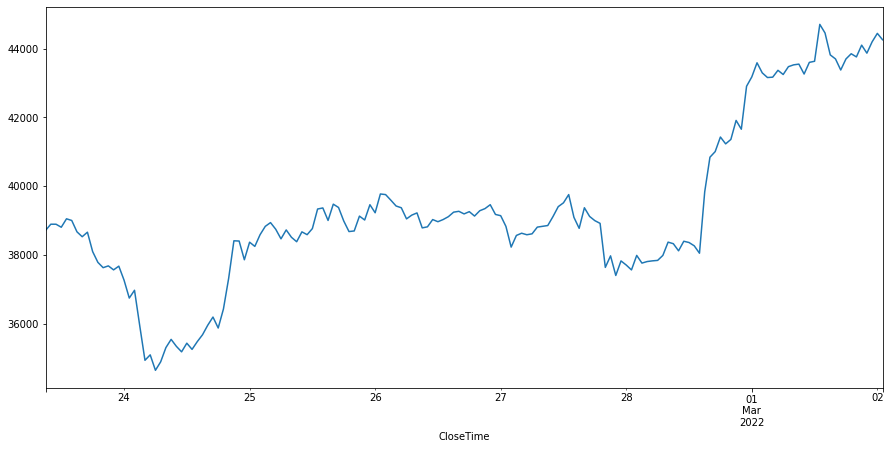

In [9]:
btc['ClosePrice'].plot(figsize=(15, 7))

<AxesSubplot:xlabel='CloseTime'>

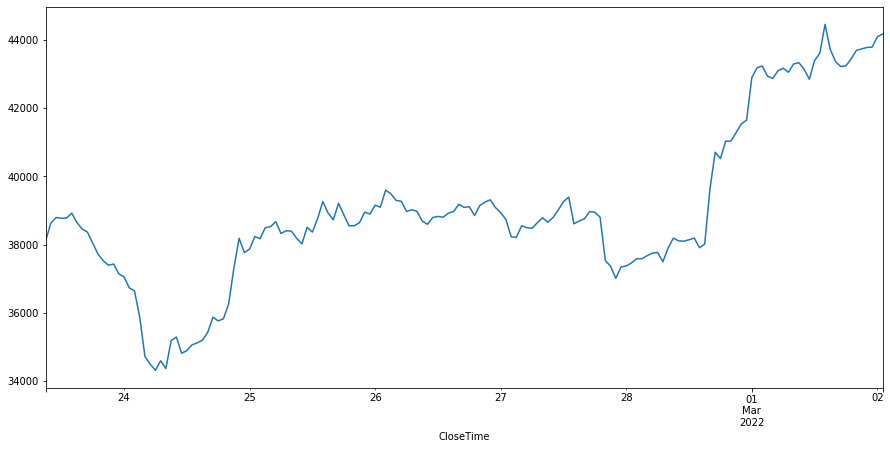

In [10]:
btc['LowPrice'].plot(figsize=(15, 7))

In [12]:
pets_list = list()
with open('pets.csv', 'r') as pets_fp:
    pets_content = pd.read_csv(pets_fp, names=['type', 'tier', 'lvl', 'candy', 'price', 'timestamp'])
    
    

In [13]:
pets_content.head()


,type,tier,lvl,candy,price,timestamp
0,BLACK_CAT,LEGENDARY,94,0,30000000,1646134600161
1,AMMONITE,LEGENDARY,40,0,1829999,1646134668164
2,OCELOT,LEGENDARY,82,0,5000000,1646134843029
3,BLUE_WHALE,RARE,1,0,100000,1646134905250
4,AMMONITE,LEGENDARY,58,0,1600000,1646134969908


In [14]:
pets.describe()


NameError: name 'pets' is not defined

In [15]:
pets_content.describe()


,lvl,candy,price,timestamp
count,321.000000,321.000000,3.210000e+02,3.210000e+02
mean,48.635514,0.990654,1.531052e+07,1.646165e+12
std,39.591838,2.707035,6.208779e+07,1.411911e+07
min,1.000000,0.000000,1.000000e+03,1.646135e+12
25%,1.000000,0.000000,4.990000e+05,1.646160e+12
50%,55.000000,0.000000,2.000000e+06,1.646165e+12
75%,87.000000,0.000000,1.000000e+07,1.646170e+12
max,100.000000,10.000000,6.549990e+08,1.646188e+12


<AxesSubplot:xlabel='timestamp'>

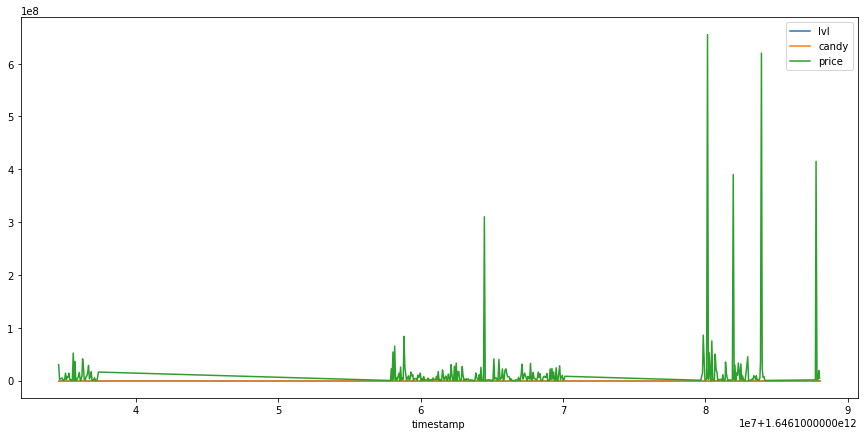

In [16]:
pets_content.plot(figsize=(15,7), x='timestamp')

<AxesSubplot:xlabel='type'>

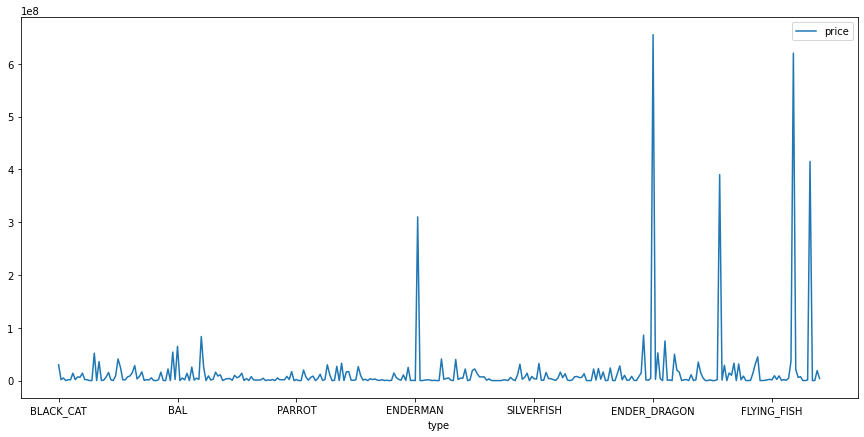

In [17]:
pets_content.plot(figsize=(15,7), x='type', y='price')

In [18]:
pets_content.pie('type')


AttributeError: 'DataFrame' object has no attribute 'pie'

In [19]:
pets_content.plot.pie('type')


TypeError: pie() takes 1 positional argument but 2 were given

ValueError: could not convert string to float: 'type'

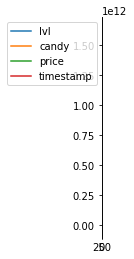

In [20]:
pets_content.plot().pie('type')

In [21]:
pets_content.clear()


AttributeError: 'DataFrame' object has no attribute 'clear'

In [22]:
with open('pets.csv', 'r') as pets_fp:
    pets_content = pd.read_csv(pets_fp, names=['type', 'tier', 'lvl', 'candy', 'price', 'timestamp'])

In [23]:
pets_content.inf()


AttributeError: 'DataFrame' object has no attribute 'inf'

In [24]:
pets_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       322 non-null    object
 1   tier       322 non-null    object
 2   lvl        322 non-null    int64 
 3   candy      322 non-null    int64 
 4   price      322 non-null    int64 
 5   timestamp  322 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 15.2+ KB


In [26]:
pets_content['type'].value_counts()


ENDERMAN           27
SHEEP              21
BABY_YETI          21
BLUE_WHALE         19
ELEPHANT           15
BAL                14
TIGER              13
WITHER_SKELETON    13
RABBIT             12
ARMADILLO          11
AMMONITE           10
GRIFFIN            10
SILVERFISH         10
MITHRIL_GOLEM       9
WOLF                9
DOLPHIN             8
SQUID               8
BLACK_CAT           7
SKELETON            7
OCELOT              7
FLYING_FISH         6
GUARDIAN            6
LION                6
ZOMBIE              4
ENDER_DRAGON        4
TURTLE              4
JERRY               4
MONKEY              4
RAT                 3
PARROT              3
MEGALODON           3
SCATHA              3
SKELETON_HORSE      3
BLAZE               3
BAT                 2
HORSE               2
HOUND               2
PIG                 2
PHOENIX             2
GIRAFFE             1
TARANTULA           1
SPIRIT              1
GHOUL               1
ENDERMITE           1
Name: type, dtype: int64

(0.0, 20000000.0)

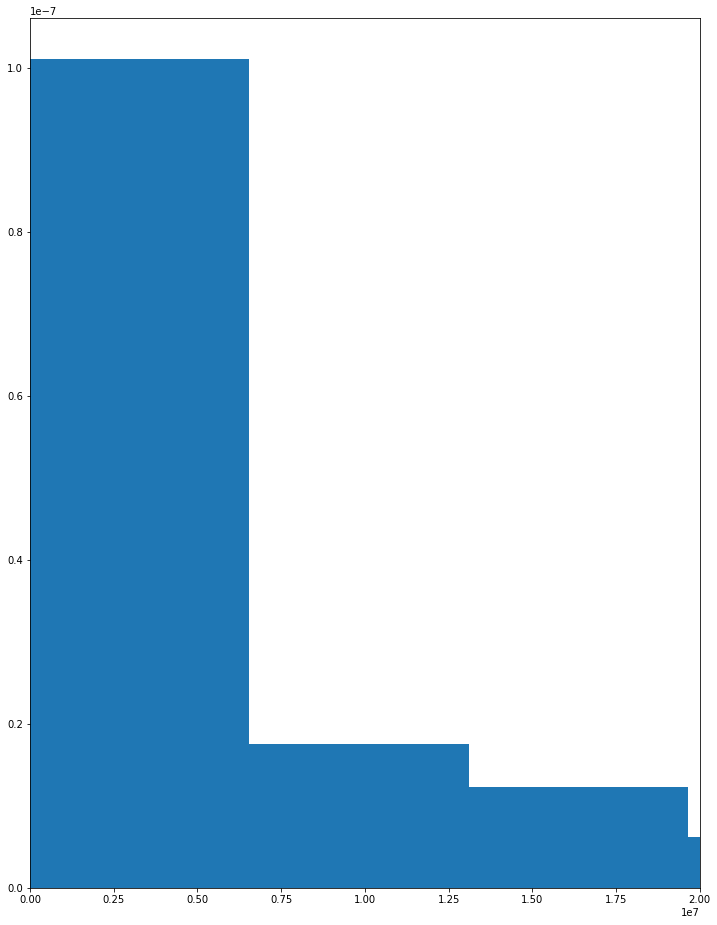

In [40]:
import matplotlib.pyplot as plt
values = pets_content['price']
plt.subplots(figsize=(12,16))
plt.hist(values, bins=100, density=True)
plt.xlim(xmin=0, xmax=20000000)